In [2]:
import sys
sys.path.append('/home/rida/GNN')

In [ ]:
import torch
import Embedding_phase.Generate_data.config as args
from Embedding_phase.Generate_data.Generate_training import transform_to_float
from Embedding_phase.MGCN.Multi_GCN import MGCN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [4]:
data = torch.load(args.DATA_PATH_6, weights_only=False)

In [5]:
data = transform_to_float(data)

In [6]:
data

[(Data(x=[2131, 18], edge_index=[2, 15488], edge_type=[15488], edge_score=[15488]),
  Data(x=[5651, 18], edge_index=[2, 110334], edge_type=[110334], edge_score=[110334]),
  1),
 (Data(x=[5831, 18], edge_index=[2, 98216], edge_type=[98216], edge_score=[98216]),
  Data(x=[5651, 18], edge_index=[2, 110334], edge_type=[110334], edge_score=[110334]),
  -1),
 (Data(x=[4811, 18], edge_index=[2, 79272], edge_type=[79272], edge_score=[79272]),
  Data(x=[5066, 18], edge_index=[2, 87584], edge_type=[87584], edge_score=[87584]),
  1),
 (Data(x=[7444, 18], edge_index=[2, 137902], edge_type=[137902], edge_score=[137902]),
  Data(x=[5066, 18], edge_index=[2, 87584], edge_type=[87584], edge_score=[87584]),
  -1),
 (Data(x=[1694, 18], edge_index=[2, 5166], edge_type=[5166], edge_score=[5166]),
  Data(x=[9637, 18], edge_index=[2, 165130], edge_type=[165130], edge_score=[165130]),
  1),
 (Data(x=[5122, 18], edge_index=[2, 105428], edge_type=[105428], edge_score=[105428]),
  Data(x=[9637, 18], edge_index=

In [7]:
len(data)

1000

In [8]:
model = MGCN(data[0][0].x.shape[1], 64, 16)

In [9]:
model.load_state_dict(torch.load(args.MODEL_SAVE_PATH_6, map_location='cpu')) 

<All keys matched successfully>

In [10]:
model.eval()

MGCN(
  (pre_mp): Sequential(
    (0): Linear(in_features=18, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (batch_norm): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): ModuleList(
    (0-7): 8 x MGCNLayer(
      (convs): ModuleList(
        (0-4): 5 x GCNConv(64, 64)
      )
      (skip): Linear(in_features=64, out_features=64, bias=True)
      (norm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU()
    )
  )
  (post_mp): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  

In [ ]:
emb = []
sous_G = []
for dataA, _, _ in data:
    sous_G.append(dataA)
    emb_dataA = model(dataA)
    emb.append(emb_dataA.detach().cpu().numpy())


In [408]:
len(emb)

1000

In [411]:
len(sous_G)

1000

In [412]:
sous_G

[Data(x=[2131, 18], edge_index=[2, 15488], edge_type=[15488], edge_score=[15488]),
 Data(x=[5831, 18], edge_index=[2, 98216], edge_type=[98216], edge_score=[98216]),
 Data(x=[4811, 18], edge_index=[2, 79272], edge_type=[79272], edge_score=[79272]),
 Data(x=[7444, 18], edge_index=[2, 137902], edge_type=[137902], edge_score=[137902]),
 Data(x=[1694, 18], edge_index=[2, 5166], edge_type=[5166], edge_score=[5166]),
 Data(x=[5122, 18], edge_index=[2, 105428], edge_type=[105428], edge_score=[105428]),
 Data(x=[316, 18], edge_index=[2, 326], edge_type=[326], edge_score=[326]),
 Data(x=[4039, 18], edge_index=[2, 63232], edge_type=[63232], edge_score=[63232]),
 Data(x=[2321, 18], edge_index=[2, 19816], edge_type=[19816], edge_score=[19816]),
 Data(x=[3551, 18], edge_index=[2, 56120], edge_type=[56120], edge_score=[56120]),
 Data(x=[1071, 18], edge_index=[2, 7574], edge_type=[7574], edge_score=[7574]),
 Data(x=[7630, 18], edge_index=[2, 148418], edge_type=[148418], edge_score=[148418]),
 Data(x=

In [440]:
all_embs = np.vstack(emb)

In [441]:
all_embs.shape

(1000, 16)

In [442]:
max_n_edges = max([m.num_edges for m in sous_G])
max_n_nodes = max([m.num_nodes for m in sous_G])

In [443]:
pca = PCA(n_components=2).fit(all_embs)
xs,ys = zip(*pca.transform(all_embs))

/tmp/ipykernel_506344/1552014989.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis", 12)


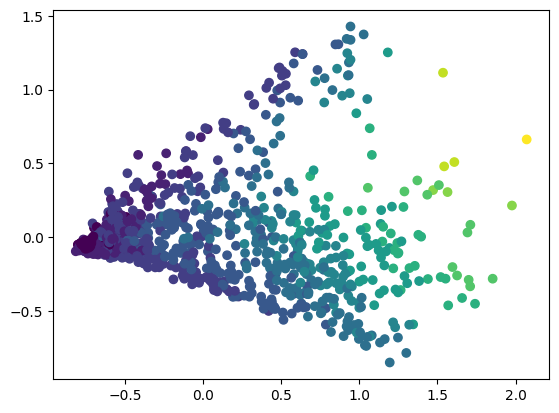

In [445]:
cmap = cm.get_cmap("viridis", 12)
colors = [cmap(m.num_nodes/max_n_nodes) for m in sous_G]
plt.scatter(xs, ys, color=colors)
plt.show()

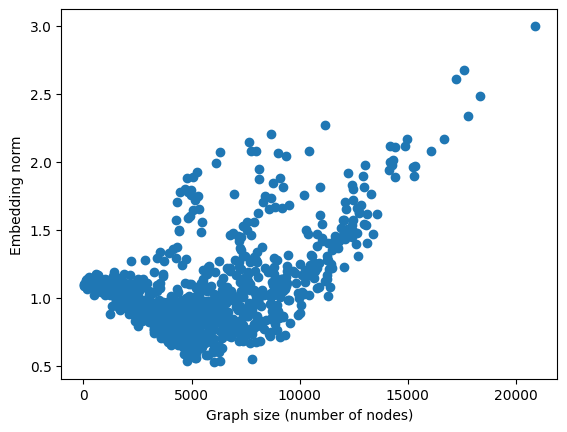

In [446]:
# plot norm vs number of nodes
xs, ys = [m.num_nodes for m in sous_G], [np.linalg.norm(e) for e in all_embs]
plt.scatter(xs, ys)
plt.xlabel("Graph size (number of nodes)")
plt.ylabel("Embedding norm")
plt.show()

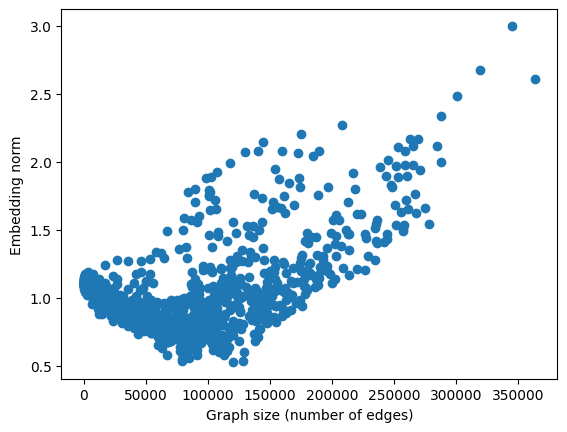

In [447]:
# plot norm vs number of edges
xs, ys = [m.num_edges for m in sous_G], [np.linalg.norm(e) for e in all_embs]
plt.scatter(xs, ys)
plt.xlabel("Graph size (number of edges)")
plt.ylabel("Embedding norm")
plt.show()